# support vector machine 

In [ ]:

In SVM, the dimension of the hyperplane depends upon which one?
In SVM, if the number of input features is 3, then the hyperplane is a.
Kernel function does not define the inner product in the transformed space.
Suppose you are using RBF kernel in SVM with high Gamma value. What does this signify? The model would consider only the points close to the hyperplane for modeling
When the C parameter is set to infinite, which of the following holds true?The optimal hyperplane if exists, will be the one that completely separates the data
If I am using all features of my dataset and I achieve 100% accuracy on my training set, but ~70% on validation set, what should I look out for?
Which of the following are not real world applications of the SVM?
What do you mean by generalization error in terms of the SVM?




- The can be used for both regression and classification we will be covering the classification part here. They involve in finding the best decision line which separates the two classes apart


- SVM is a discriminative models, they just focous on separating the class and don't tell much aobut the behaviour of the class  they cannot be used to create synthetic datapoints unlike generative models


- The best decesion line is that line which is fartherest from the support vectors. Thing of this like India Pakistan border one will stay as far as possible from the redcliff line to avoid casulities 


- SVMS are robust to outliers because it depends on the support vectors only to determine the line 

# How does it work 
The data is plotted, a line is decided that separates the two class apart, the prediction is done, then likelihood function is use to check how close you assumption is to the actuall assumption, we use the modified verion of cross entropy loss functin and try to optimize it to reduce the error 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
sns.set()

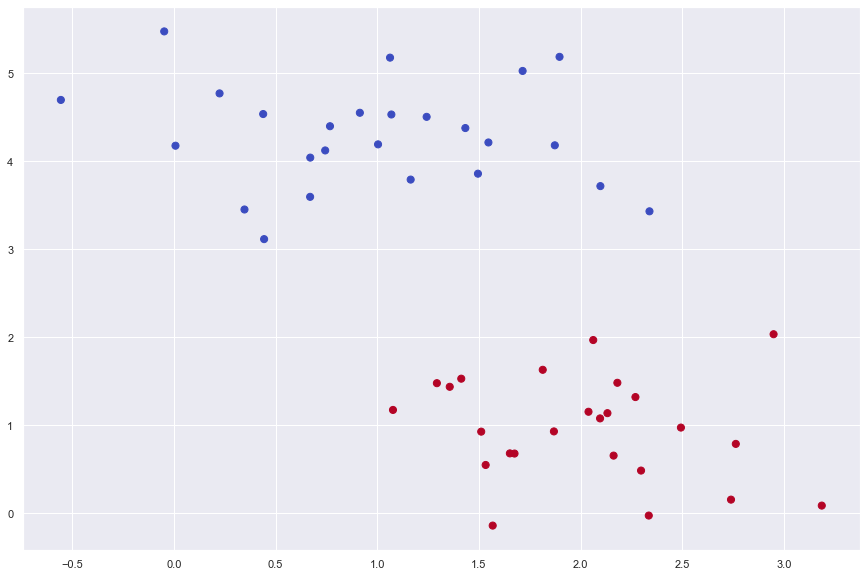

In [6]:

from sklearn.datasets import make_blobs
plt.figure(figsize = (15,10))
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm') # c = y is color coding to represent y it is compresed to show the 
#data in to 2d for just like we use contour graps and different colors
plt.show()

In [26]:
X[:5],y[:5]# 2 features and target(binary class)

(array([[1.41281595, 1.5303347 ],
        [1.81336135, 1.6311307 ],
        [1.43289271, 4.37679234],
        [1.87271752, 4.18069237],
        [2.09517785, 1.0791468 ]]),
 array([1, 1, 0, 0, 1]))

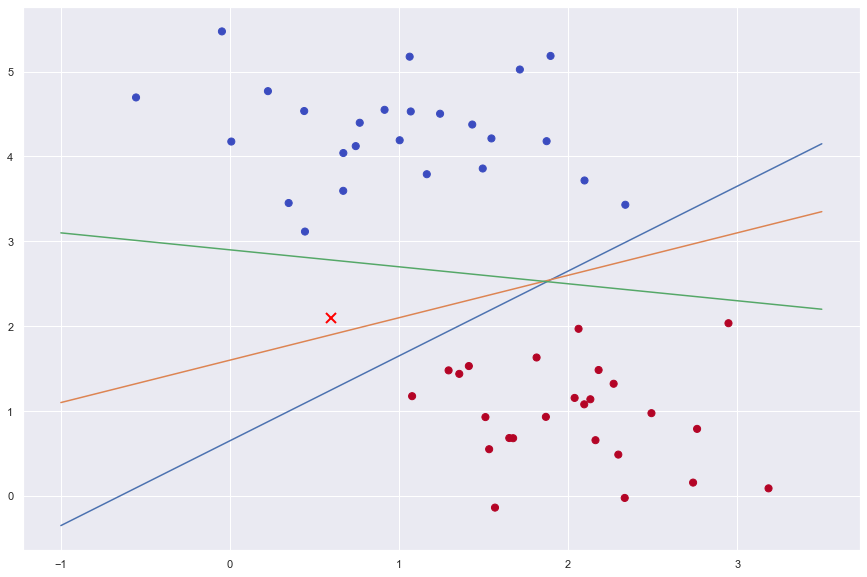

In [39]:
# let's plot a datapoint and pass line 
xfit = np.linspace(-1,3.5)# values of x to fit in mx + c where m is slope and c is the contast
plt.figure(figsize = (15,10))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm')
plt.plot([0.6],[2.1],'x',color = 'red',markeredgewidth = 2, markersize = 10)

for m,c in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit,m*xfit+c)
   

if we choose line green though it is close to the green point but it is not the best decision line we basically we choose the line which is father from the support vectors

-  In SVM, support vectors are data points from the training dataset that play a crucial role in defining the decision boundary, also known as the hyperplane, that separates different classes or aids in regression.

- Support Vectors: Support vectors are the data points that define the margin, meaning they are the points that lie closest to the decision boundary. They are the data points that are most challenging to classify correctly or are the most informative for defining the decision boundary. Support vectors "support" the hyperplane because if you were to remove them or change their positions, the hyperplane would shift.

(-1.0, 3.5)

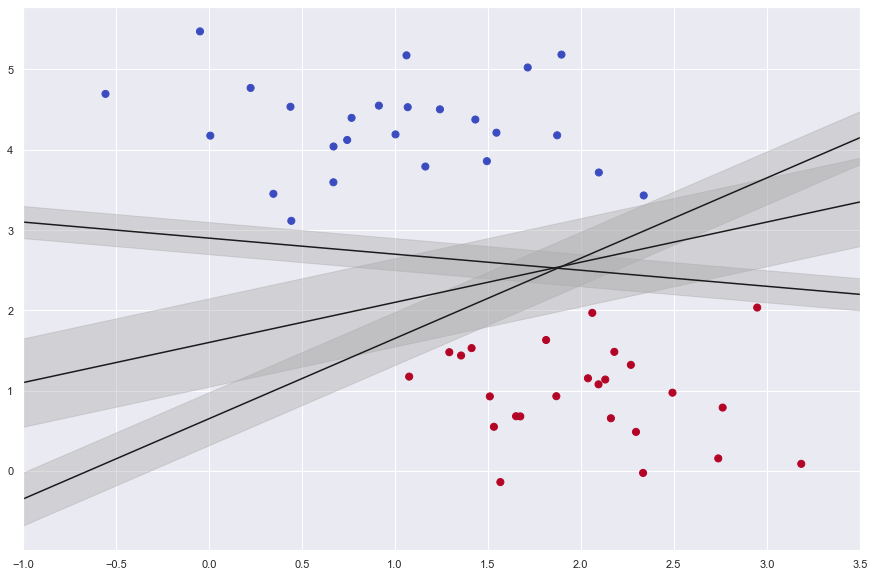

In [41]:
plt.figure(figsize = (15,10))
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

the line with the maximum margin is the best decison line/ in terms of india pakistan border the no man land which is maximum is the best border 

if you have a very high margin you will see that there is a lots of datapoint which will fall inside the margin and if you have a dataset where there is no clear sepratiion between the class then you will have a high misclassified class hence we kind of increase the margin and also try to reduce the misclassification of classes 

To understand this concept consider the inda bangladesh border there are muslim bengalis which are from bangladesh but say in culcatta and vice versa this means when margin is high misclassification of datapoints are allowed just like some bengalis are allowed in the culcatta region 

**If we have a non linear data set we increase the dimension of the data using kernel trick and plot a hyperplane to distinguish classes**

In Support Vector Machines (SVM), soft margin and hard margin are two concepts related to how the SVM classifier handles the separation of data points in a feature space. SVM is used for binary classification, where it aims to find a hyperplane that best separates the two classes. The difference between soft margin and hard margin lies in how they handle cases where the data is not perfectly separable.

1. Hard Margin SVM:
   - Hard margin SVM seeks to find a hyperplane that perfectly separates the two classes without any misclassification. In other words, it assumes that the training data is linearly separable, and it enforces a strict constraint that all data points must be correctly classified and lie outside a certain margin.
   - If the data is linearly separable, hard margin SVM will find the hyperplane that maximizes the margin between the classes while satisfying this constraint. It's a more conservative approach, but it may not work well when the data has noise or is not perfectly separable.

2. Soft Margin SVM:
   - Soft margin SVM is a more flexible approach that allows for some misclassification. It's used when the data is not perfectly linearly separable and might contain outliers or noise. The objective of the soft margin SVM is to find a hyperplane that still separates the majority of data points correctly but allows for a certain degree of misclassification.
   - Soft margin SVM introduces a regularization parameter C, which controls the trade-off between maximizing the margin and minimizing the classification error. A smaller C allows for a larger margin but tolerates more misclassification, while a larger C seeks to minimize misclassification, potentially at the expense of a narrower margin.

The choice between using a soft margin or a hard margin SVM depends on the nature of the data and the problem you are trying to solve:

- If you are confident that the data is perfectly separable and without noise, a hard margin SVM may be suitable.
- If the data is noisy or not linearly separable, using a soft margin SVM with an appropriate value of C can lead to a more robust and generalizable classifier.

The key idea in SVM is to find a balance between maximizing the margin and minimizing classification errors, and this balance is achieved through the choice of a hard or soft margin and the appropriate tuning of the hyperparameter C.

**If we have a very high value of c then we will have a low margin and few misclassfication vice versa**


if there is no clear separation of classes then we can use the value of c to be high wihch will give us a low margin and less misclassification but if we have a clear sepration of class we can use a low value of c 

There is a trade of between the size of the margin and misclassification of data points 

Yes, your understanding is correct. The choice of the regularization parameter C in a soft margin SVM allows you to adjust the trade-off between maximizing the margin and minimizing classification errors. Here's how it works in practice:

1. High C (Low Margin):
   - When you set a high value for C, the SVM will prioritize minimizing misclassification errors, even at the expense of having a smaller margin. This is suitable when you have noisy or overlapping data points or when you want to classify as many data points correctly as possible. It results in a narrower margin and a more complex decision boundary.

2. Low C (High Margin):
   - Conversely, when you set a low value for C, the SVM will prioritize maximizing the margin, even if it means tolerating some misclassification errors. This is appropriate when you have a clear separation between classes, and you want a simpler decision boundary that is less affected by individual data points or noise.

In summary, you can adjust the value of C based on your prior knowledge or analysis of the data. If you believe that the data has a clear separation between classes, a lower value of C can lead to a larger margin and a more robust classifier. If you suspect that the data is noisy or there is some overlap between classes, a higher value of C can help the SVM focus on minimizing misclassification errors.

Keep in mind that the optimal value of C often needs to be determined through techniques like cross-validation, where you train the SVM with different values of C and select the one that performs best on a validation dataset. This ensures that your choice of C is data-driven and results in a well-generalized model.


- A "small margin" generally refers to a narrow margin between the two classes, and this is associated with a "hard margin" SVM. In a hard margin SVM, the goal is to find a hyperplane that perfectly separates the classes, and as a result, the margin is minimized.

- A "large margin" typically refers to a wide margin between the two classes, and this is associated with a "soft margin" SVM. In a soft margin SVM, the goal is to find a hyperplane that separates the majority of data points correctly but allows for a certain degree of misclassification, resulting in a wider margin.

In summary:

- A "small margin" corresponds to a "hard margin" SVM, where the emphasis is on minimizing the margin.

- A "large margin" corresponds to a "soft margin" SVM, where the emphasis is on maximizing the margin while allowing for some misclassification.

I hope this clears up any confusion.

# The representation of margin for a data set where there is no clear sepration between the classes


In [8]:
from sklearn.svm import SVC #Support vector classifier
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

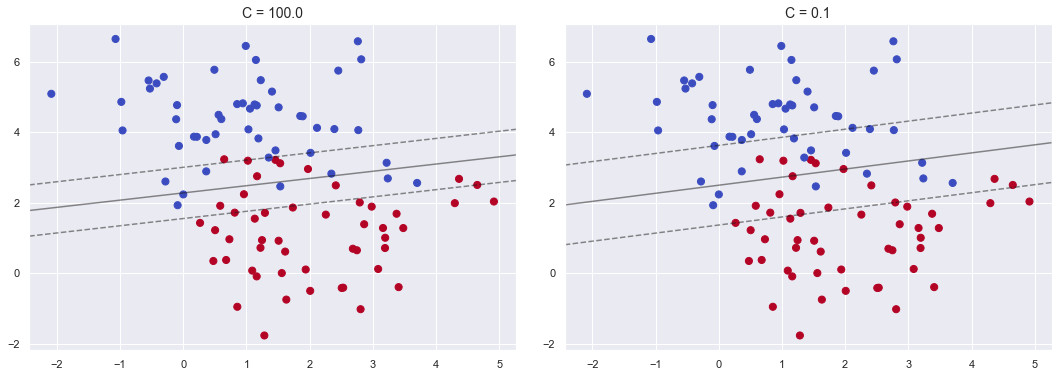

In [14]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [100.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

fig (1) - It has a small margin which is achived by setting the value of c as maximum and because of small margin there is less no. of misclassified classes small margin is associated with hard margin 

In fig(2) we have a large margin which is achieved by setting up a small value of c and because of large margin we have lots of misclassfied data points large margin is associated with soft margin 

The margin helps us to avoid overfitting of the model , i.e is generalizes well 

# C is strictness coefficient 
c is inversely related to regularization parameter

Focous on these terms only- Hard margin, soft margin, kernel tricks(polynomial and RBF), C, support vectors

In [17]:
# non linear datasets refer the class notebook

# kernel trink in svm to increase the dataset dimension for non linear dataset

Support Vector Machines (SVMs) use kernel functions to implicitly map data points into a higher-dimensional feature space, making it possible to find nonlinear decision boundaries. There are several different types of kernel functions that can be used in SVMs. Some of the most commonly used kernel functions include:

Linear Kernel (Linear SVM): This is the simplest kernel and doesn't involve any mapping; it represents the original feature space. It's used when the data is linearly separable in the original feature space. The linear kernel can be expressed as K(x, y) = xᵀy, where x and y are the feature vectors of two data points.

Polynomial Kernel: The polynomial kernel introduces non-linearity by mapping data into a higher-dimensional space using polynomial functions. It is characterized by a degree parameter 'd', which determines the order of the polynomial. The kernel function is K(x, y) = (xᵀy + c)ᵈ, where 'c' is a constant.

Radial Basis Function (RBF) Kernel: The RBF kernel, also known as the Gaussian kernel, is commonly used for SVMs. It can model complex, non-linear decision boundaries. The kernel function is K(x, y) = exp(-γ‖x - y‖²), where 'γ' is a positive constant that controls the shape of the kernel.

In [1]:
# let's do a pratical implementation 

In [2]:
pwd

'C:\\Users\\Deepu\\Documents\\machine_learning'

In [3]:
cd C:\\Users\\Deepu\\Downloads

C:\Users\Deepu\Downloads


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
df = pd.read_csv('tweets.csv')

In [9]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [16]:
df.shape

(14640, 15)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

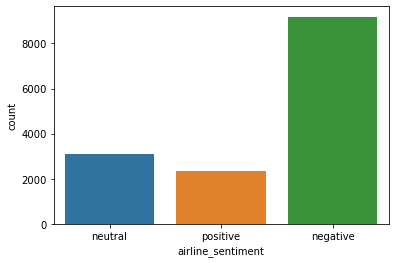

In [22]:
sns.countplot(df.airline_sentiment)

In [23]:
#let's see the distribution of the continous variable 
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [24]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [35]:
df['length'] = df['text'].apply(len)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


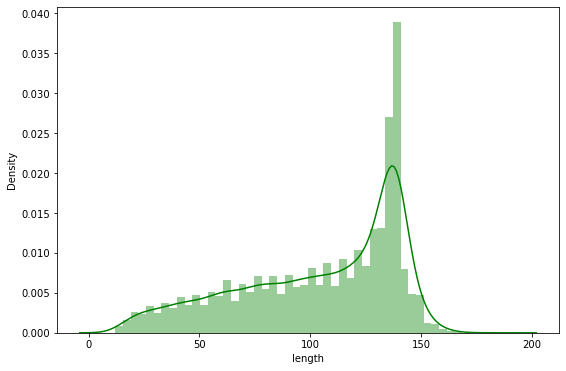

In [44]:
plt.figure(figsize = (9,6))
sns.distplot(df.length,bins = 50,color = "green")
plt.show()

**This means there are lots of tweet which have a length of 100 to 150 and a lot of data points are concentrated around that point**

In [50]:
df.length.describe()

count    14640.000000
mean       103.822063
std         36.277339
min         12.000000
25%         77.000000
50%        114.000000
75%        136.000000
max        186.000000
Name: length, dtype: float64

186

In [80]:
df.length.max()

186

In [81]:
df[df['length'] == df.length.max()]

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,length
10405,569328854948573187,positive,0.6925,NaN,0.0,US Airways,NaN,zfelice,NaN,0,"@USAirways Eyyyy! Cancelled Flightlations, Fli...",NaN,2015-02-21 18:52:31 -0800,"This Ain't Chicago, Tennessee",Central Time (US & Canada),186


In [90]:
# Another way to find the tweet with max length 
for i in range(len(df.length)):
    if df.length[i] == 186:
        print(df.loc[i,['text']])


text    @USAirways Eyyyy! Cancelled Flightlations, Fli...
Name: 10405, dtype: object


In [95]:
# since we are concern with only two columns lets check if there is any null values 
df[['airline_sentiment','text']].isnull().sum().sum()

0

In [96]:
# Now we will remove the punctuation and stop words from the text


In [97]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Deepu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [99]:
import string
from nltk.corpus import stopwords

In [101]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [102]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [113]:
def text_process(x):
    pun_remove=[i for i in x if i not in string.punctuation]
    pun_remove = ''.join(pun_remove)
    return pun_remove

In [115]:
pun_remove=[i for i in df.text[0] if i not in string.punctuation]
pun_remove = ''.join(pun_remove)
print(pun_remove)
print(pun_remove.split())

VirginAmerica What dhepburn said
['VirginAmerica', 'What', 'dhepburn', 'said']


In [114]:
df.text.apply(lambda x: text_process(x))

0                         VirginAmerica What dhepburn said
1        VirginAmerica plus youve added commercials to ...
2        VirginAmerica I didnt today Must mean I need t...
3        VirginAmerica its really aggressive to blast o...
4        VirginAmerica and its a really big bad thing a...
                               ...                        
14635    AmericanAir thank you we got on a different fl...
14636    AmericanAir leaving over 20 minutes Late Fligh...
14637    AmericanAir Please bring American Airlines to ...
14638    AmericanAir you have my money you change my fl...
14639    AmericanAir we have 8 ppl so we need 2 know ho...
Name: text, Length: 14640, dtype: object

In [122]:
def text_process_mod(x):
    pun_remove=[char for char in x if char not in string.punctuation]
    pun_remove = ''.join(pun_remove)
    
    stop_removed=[word for word in pun_remove.split() if word.lower() not in stopwords.words('english')]
    stop_removed = ' '.join(stop_removed)
    return stop_removed

In [123]:
df['tokenized_tweet'] = df['text'].apply(text_process_mod)

In [124]:
df['tokenized_tweet']

0                              VirginAmerica dhepburn said
1        VirginAmerica plus youve added commercials exp...
2        VirginAmerica didnt today Must mean need take ...
3        VirginAmerica really aggressive blast obnoxiou...
4                       VirginAmerica really big bad thing
                               ...                        
14635       AmericanAir thank got different flight Chicago
14636    AmericanAir leaving 20 minutes Late Flight war...
14637    AmericanAir Please bring American Airlines Bla...
14638    AmericanAir money change flight dont answer ph...
14639    AmericanAir 8 ppl need 2 know many seats next ...
Name: tokenized_tweet, Length: 14640, dtype: object

In [121]:
text_process_mod(df.text[0])

'VirginAmerica dhepburn said'

In [127]:
#we will be focousing on the positive and the negative class only 
df=df[df['airline_sentiment'] != 'neutral'].reset_index()

In [129]:
df.airline_sentiment.value_counts()

negative    9178
positive    2363
Name: airline_sentiment, dtype: int64

In [133]:
# let's just focous on the tweet and sentiment 
tweet = df[['airline_sentiment','tokenized_tweet','length']]

In [134]:
tweet.head()

,airline_sentiment,tokenized_tweet,length
0,positive,VirginAmerica plus youve added commercials exp...,72
1,negative,VirginAmerica really aggressive blast obnoxiou...,126
2,negative,VirginAmerica really big bad thing,55
3,negative,VirginAmerica seriously would pay 30 flight se...,135
4,positive,VirginAmerica yes nearly every time fly VX “ea...,79


In [135]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11541 entries, 0 to 11540
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  11541 non-null  object
 1   tokenized_tweet    11541 non-null  object
 2   length             11541 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 270.6+ KB


In [136]:
# Let's do train test split and then do the vectorization 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(tweet['tokenized_tweet'],tweet['airline_sentiment'],test_size = 0.4, random_state = 30)

In [140]:
x_train.shape,y_train.shape

((6924,), (6924,))

In [141]:
x_test.shape,y_test.shape

((4617,), (4617,))

In [142]:
x_train.head()

10318    AmericanAir Also wait 2 hours speak someone ph...
881      united three people awesome working long hours...
3237     united thanks rude customer service 3 hour del...
7500     USAirways name Rett Cavan gofundme page going ...
7420     USAirways hire smarter people systems keep cra...
Name: tokenized_tweet, dtype: object

In [145]:
pd.set_option('display.max_colwidth', -1) # system command to see all the text

C:\Users\Deepu\AppData\Local\Temp\ipykernel_1308\1421825631.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1) # system command to see all the text


In [146]:
x_train.head()

10318    AmericanAir Also wait 2 hours speak someone phone cant wait 2 hours                                      
881      united three people awesome working long hours easy say sorry Twitter help ppl EWR                       
3237     united thanks rude customer service 3 hour delay really helped timing wise afternoon meetings Hello Delta
7500     USAirways name Rett Cavan gofundme page going take last breath tonight airline cares money               
7420     USAirways hire smarter people systems keep crashing instead mooks man airports goDelta                   
Name: tokenized_tweet, dtype: object

In [147]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [148]:
# transformation 
train_vectorizered = vectorizer.fit_transform(x_train)
test_vectorizered = vectorizer.transform(x_test)

In [151]:
# we will have a sparse matrix 
train_vectorizered.toarray(), test_vectorizered.toarray()

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64))

# fit model svm

In [152]:
from sklearn import svm
clf = svm.SVC()

In [153]:
clf.fit(train_vectorizered,y_train)

SVC()

In [155]:
train_pred = clf.predict(train_vectorizered)

In [156]:
test_pred = clf.predict(test_vectorizered)

In [157]:
from sklearn.metrics import confusion_matrix

In [158]:
#train
confusion_matrix(y_train,train_pred)

array([[5481,   24],
       [ 170, 1249]], dtype=int64)

In [159]:
# test
confusion_matrix(y_test,test_pred)

array([[3604,   69],
       [ 369,  575]], dtype=int64)

In [161]:
from sklearn.metrics import roc_auc_score

In [165]:
from sklearn import datasets,metrics, model_selection,svm

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


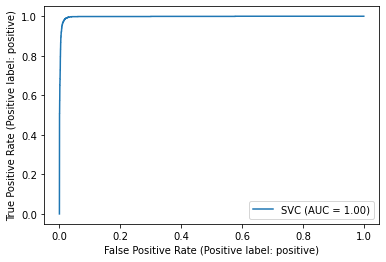

In [169]:
metrics.plot_roc_curve(clf,train_vectorizered,y_train)

### handling the huge class imblance evaluation with precision recall curve 
https://www.youtube.com/watch?v=EluMarMGezc

roc curve is between True positive rate and false positive rate it does not take the consideration of True negative and if we have a massively imbalanced data set then the roc curve does not paint a correct picture of the model performance so we use precession recall curve precesion is TP/TP+ FP and recall is TP/TP+FN 

Our model performation should be test on TN and FN which is recall of negative class over here the case is oppostise just keep that in mind the TP are less and True negative are more so adjust as per the data in hand , I have covered the explaination as per the youtube video

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


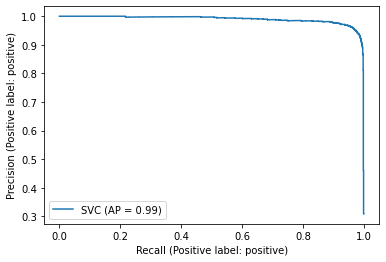

In [173]:
metrics.plot_precision_recall_curve(clf,train_vectorizered,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


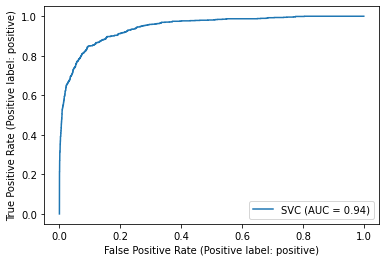

In [170]:
metrics.plot_roc_curve(clf,test_vectorizered,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


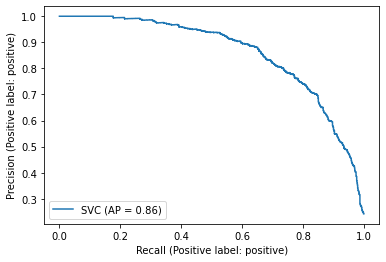

In [174]:
metrics.plot_precision_recall_curve(clf,test_vectorizered,y_test)

Here is a new way to look at the concept of precision let's say john is a criminal and the precision of your model is 89% this means there is 89% chance that your model will say that yes john is a criminal

# let's do a grid search on top on svm but first lets understand the main difference between the c value and the gamma hyperparameters 


## In Support Vector Machines (SVM), both the `C` parameter and the `gamma` parameter are critical hyperparameters, but they serve different purposes and have distinct effects on the SVM model. Let's explore the differences between these two parameters:

1. **C Parameter (Regularization Parameter):**
   - The `C` parameter is responsible for controlling the trade-off between maximizing the margin between classes and minimizing the classification error on the training data.
   - It is essentially a regularization parameter. A smaller `C` value encourages a wider margin but allows for more training points to be misclassified (soft margin), while a larger `C` value enforces a narrower margin and minimizes the training error (hard margin).
   - A smaller `C` value makes the SVM more tolerant of misclassified data points, leading to a smoother decision boundary and potentially increased bias (underfitting).
   - A larger `C` value makes the SVM less tolerant of misclassified points, leading to a more complex and flexible decision boundary, potentially at the risk of overfitting.

2. **Gamma Parameter (Kernel Parameter):**
   - The `gamma` parameter, on the other hand, is specific to SVMs using non-linear kernels (e.g., radial basis function or RBF kernel).
   - It controls the shape of the decision boundary by determining the influence of a single training example on the decision boundary.
   - A small `gamma` value implies that the influence of a data point is more widespread, resulting in a smoother, more generalized decision boundary.
   - A large `gamma` value implies that the influence is more localized, resulting in a more complex and localized decision boundary that can closely fit the training data.

In summary, the `C` parameter primarily regulates the balance between the margin and training error, while the `gamma` parameter impacts the complexity and flexibility of the decision boundary, particularly in non-linear SVMs using kernel functions. These parameters are crucial for tuning the SVM model to achieve the best trade-off between bias and variance for your specific classification problem. The optimal values for `C` and `gamma` depend on the characteristics of your dataset, and it often requires experimentation and hyperparameter tuning to find the most suitable values. 

In [178]:
param_dict = {
    'C' : [0.1,1,10,1000],
    'gamma': [1,0.1,0.01,0.0001],
    'kernel' : ['rbf','linear','poly']
}

In [176]:
# low c means soft margin means more misclassified classes and vice versa , there is a trade here which we have to deal with
# low gamma means a simple and more generalize boundary where as high gamma means a complex boundary 


In Support Vector Machines (SVMs), the choice of kernel is a fundamental hyperparameter that determines the type of decision boundary the SVM will create. The SVM uses different kernel functions to map the input data into a higher-dimensional feature space, where it can separate the data points. The three common kernel functions are:

1. **Radial Basis Function (RBF) Kernel:**
   - The RBF kernel, also known as the Gaussian kernel, is one of the most widely used kernels in SVMs.
   - It is suitable for both linear and non-linear classification problems.
   - The RBF kernel allows the SVM to capture complex, non-linear relationships in the data by transforming it into a higher-dimensional space.
   - The kernel's shape is determined by the `gamma` hyperparameter, which controls the width of the Gaussian curve used for mapping the data.

2. **Linear Kernel:**
   - The linear kernel is the simplest and most straightforward kernel.
   - It is appropriate for linearly separable data, where the decision boundary is a straight line.
   - When using the linear kernel, the SVM performs linear classification without any transformation of the data into a higher-dimensional space.
   - The linear kernel can be effective for tasks where the classes can be separated by a straight line, plane, or hyperplane.

3. **Polynomial (Poly) Kernel:**
   - The polynomial kernel is used to capture non-linear relationships in the data by transforming it into a higher-dimensional space using polynomial functions.
   - The degree of the polynomial is controlled by the `degree` hyperparameter. Higher degrees can capture more complex non-linear relationships but may lead to overfitting.
   - The polynomial kernel is suitable for data with complex curved decision boundaries.

In summary, the choice of kernel in SVMs depends on the nature of your data and the specific problem you are trying to solve. Here's a brief guideline for selecting a kernel:

- Use the **Linear Kernel** when your data is linearly separable, and you want a simple, interpretable model with a linear decision boundary.

- Use the **RBF Kernel** (Gaussian Kernel) by default or when you suspect that the data has non-linear patterns, as it is effective in capturing complex relationships.

- Use the **Polynomial Kernel** when you believe that a polynomial relationship is a good representation of the underlying data, but be cautious about overfitting, especially with higher polynomial degrees.

The choice of kernel should be part of your hyperparameter tuning process, along with other hyperparameters like `C` and `gamma` (if using an RBF kernel).

## difference between the rbf and polynomial kernel

the primary difference between the Radial Basis Function (RBF) kernel and the Polynomial (Poly) kernel in SVMs lies in the shape of the contours or decision boundaries they create when mapping the data into higher-dimensional feature spaces.

- **RBF Kernel:** The RBF kernel uses a Gaussian-like curve to transform the data. The shape of this curve is controlled by the `gamma` hyperparameter. A smaller `gamma` results in a wider curve, and a larger `gamma` results in a narrower curve. The decision boundary created by the RBF kernel can be more flexible and can capture complex, curved patterns in the data.

- **Polynomial Kernel:** The Polynomial kernel, on the other hand, transforms the data using polynomial functions. The degree of the polynomial is controlled by the `degree` hyperparameter. Higher degrees create more complex polynomial functions that can capture intricate non-linear patterns in the data. However, increasing the degree can also lead to a more complex and localized decision boundary, potentially resulting in overfitting.

In essence, the choice of kernel function affects the contours of the decision boundary in the feature space. The RBF kernel produces smoother, more flexible contours, while the Polynomial kernel generates contours based on polynomial functions of varying complexity. Your choice between these kernels should be based on the characteristics of your data and the problem you are trying to solve. Experimenting with different kernels and hyperparameters and evaluating their performance using techniques like cross-validation can help you determine the most suitable kernel for your specific application.

In short they differ by making the contour of the graph and hence the polynomial are a bit on the complex side 

In [179]:
from sklearn.model_selection import GridSearchCV

In [180]:
grid_tf = GridSearchCV(clf,param_dict,n_jobs = 2,cv = 5,verbose = 10, scoring = 'accuracy')

In [182]:
grid_tf.fit(train_vectorizered,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=2,
             param_grid={'C': [0.1, 1, 10, 1000],
                         'gamma': [1, 0.1, 0.01, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly']},
             scoring='accuracy', verbose=10)

In [184]:
grid_tf.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [185]:
train_pred_grid=grid_tf.predict(train_vectorizered)

In [186]:
test_pred_grid = grid_tf.predict(test_vectorizered)

In [188]:
# train
print(confusion_matrix(y_train,train_pred_grid))

[[5463   42]
 [ 125 1294]]


In [189]:
# test
print(confusion_matrix(y_test,test_pred_grid))

[[3557  116]
 [ 288  656]]


In [191]:
from sklearn.metrics import classification_report

In [192]:
# Print the classification report for train and test
print(classification_report(y_train,train_pred_grid))
print("\n")
print(classification_report(y_test,test_pred_grid))

              precision    recall  f1-score   support

    negative       0.98      0.99      0.98      5505
    positive       0.97      0.91      0.94      1419

    accuracy                           0.98      6924
   macro avg       0.97      0.95      0.96      6924
weighted avg       0.98      0.98      0.98      6924



              precision    recall  f1-score   support

    negative       0.93      0.97      0.95      3673
    positive       0.85      0.69      0.76       944

    accuracy                           0.91      4617
   macro avg       0.89      0.83      0.86      4617
weighted avg       0.91      0.91      0.91      4617



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


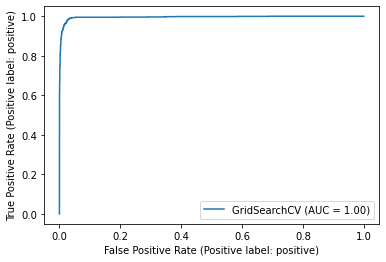

In [193]:
from sklearn import datasets, metrics, model_selection, svm
metrics.plot_roc_curve(grid_tf, train_vectorizered, y_train)  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


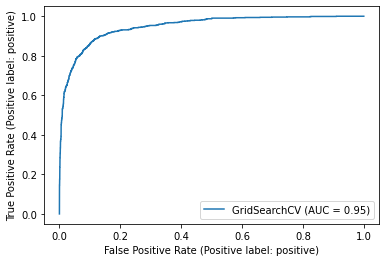

In [194]:
metrics.plot_roc_curve(grid_tf, test_vectorizered, y_test)  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


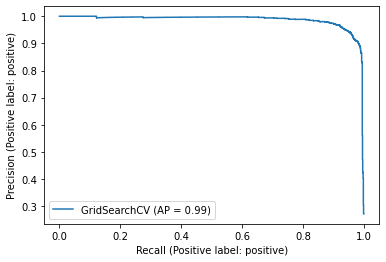

In [196]:
metrics.plot_precision_recall_curve(grid_tf, train_vectorizered, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


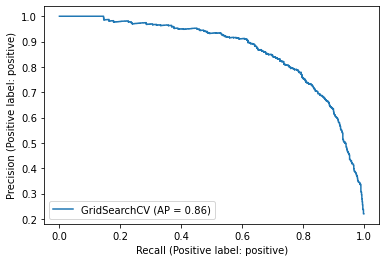

In [198]:
metrics.plot_precision_recall_curve(grid_tf, test_vectorizered, y_test)


In [199]:
# we have a average precesion of 0.86